<a href="https://www.kaggle.com/code/chandruuk/stroke-prediction-dataset?scriptVersionId=107490409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Reading Dataset

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics


In [3]:
data=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [4]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.shape

(5110, 12)

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Inspecting and Cleaning Dataset

In [9]:
mean_value=data['bmi'].mean()
data['bmi'].fillna(value=mean_value, inplace=True)
data["bmi"]=data["bmi"].round(1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893503,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Outliers**

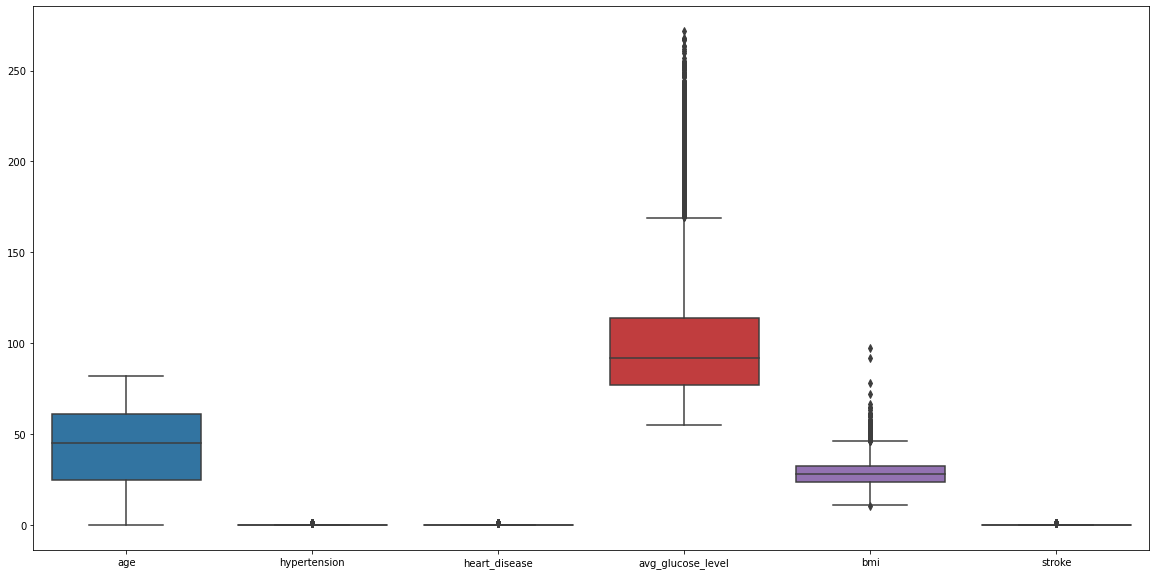

In [14]:
df=data.drop(["id"],axis=1)
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

outlier in bmi 97.6


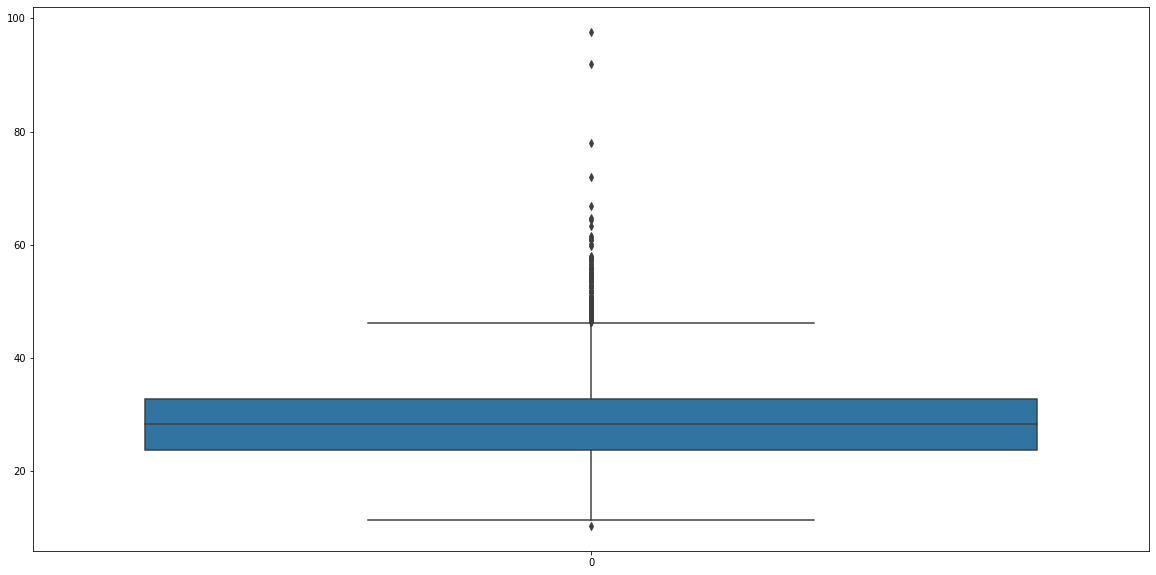

In [15]:
print("outlier in bmi",data['bmi'].max())
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data["bmi"])
plt.show()

outlier in avg_glucose_level 271.74


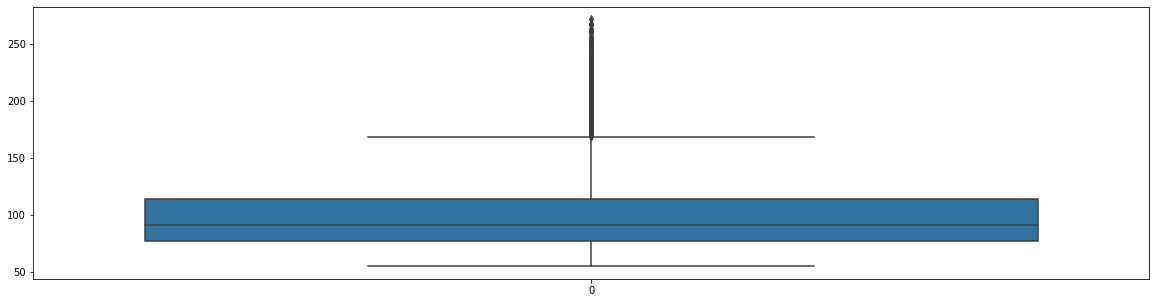

In [16]:
print("outlier in avg_glucose_level",data["avg_glucose_level"].max())
plt.figure(figsize=(20,5), facecolor='w')
sns.boxplot(data=data["avg_glucose_level"])
plt.show()

In [17]:
data=data[data['bmi']<60.0]
data=data[data['bmi']<180.00]

In [18]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325956,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160205,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168767,0.131945
bmi,0.325956,0.160205,0.038916,0.168767,1.000000,0.038971
stroke,0.245257,0.127904,0.134914,0.131945,0.038971,1.000000


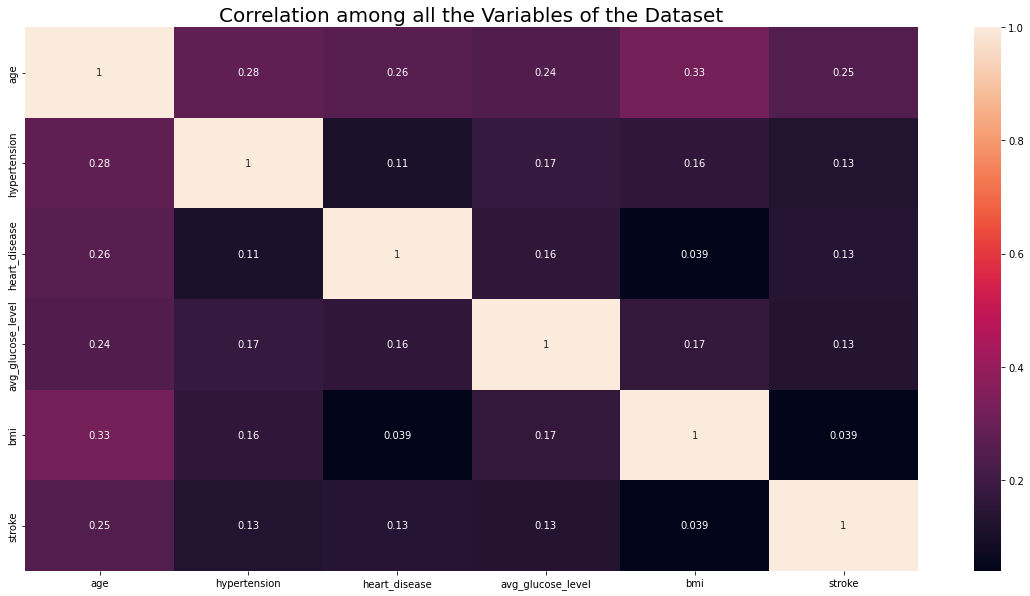

In [19]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

## Univariate Analysis

In [20]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

gender :
Female    2985
Male      2111
Other        1
Name: gender, dtype: int64
-----------------
hypertension :
0    4604
1     493
Name: hypertension, dtype: int64
-----------------
heart_disease :
0    4821
1     276
Name: heart_disease, dtype: int64
-----------------
ever_married :
Yes    3342
No     1755
Name: ever_married, dtype: int64
-----------------
smoking_status :
never smoked       1887
Unknown            1540
formerly smoked     885
smokes              785
Name: smoking_status, dtype: int64
-----------------


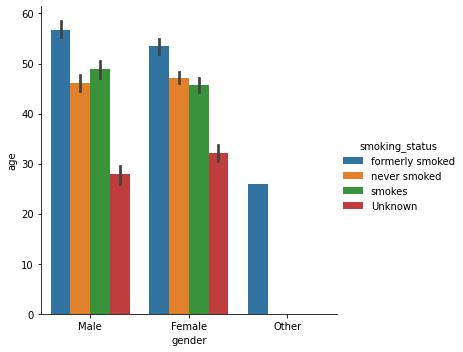

In [21]:
sns.catplot(data=data, x="gender", y="age",hue="smoking_status", kind="bar")

smoking status of all gender with age


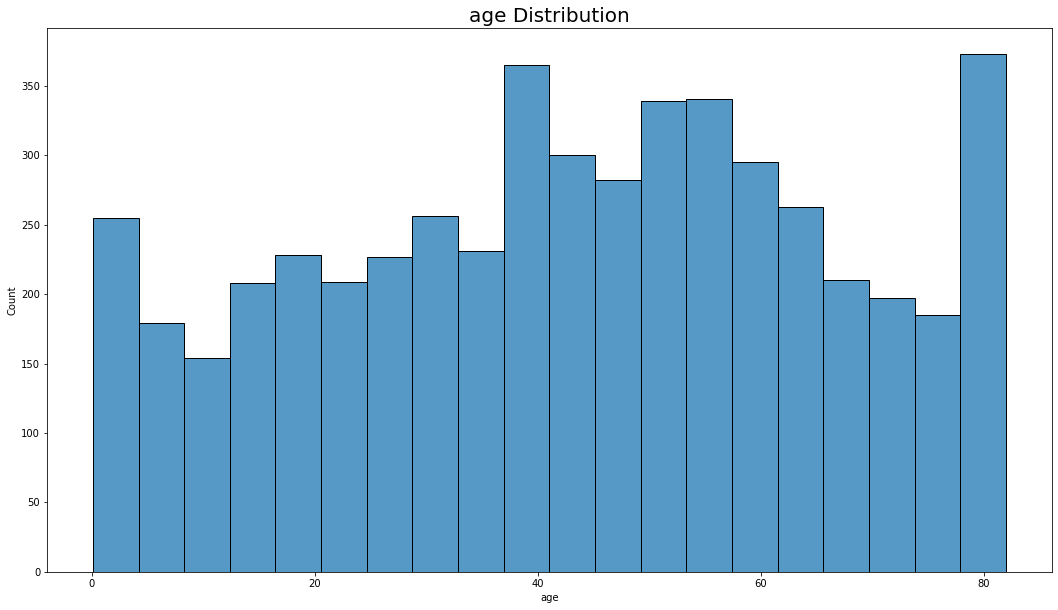

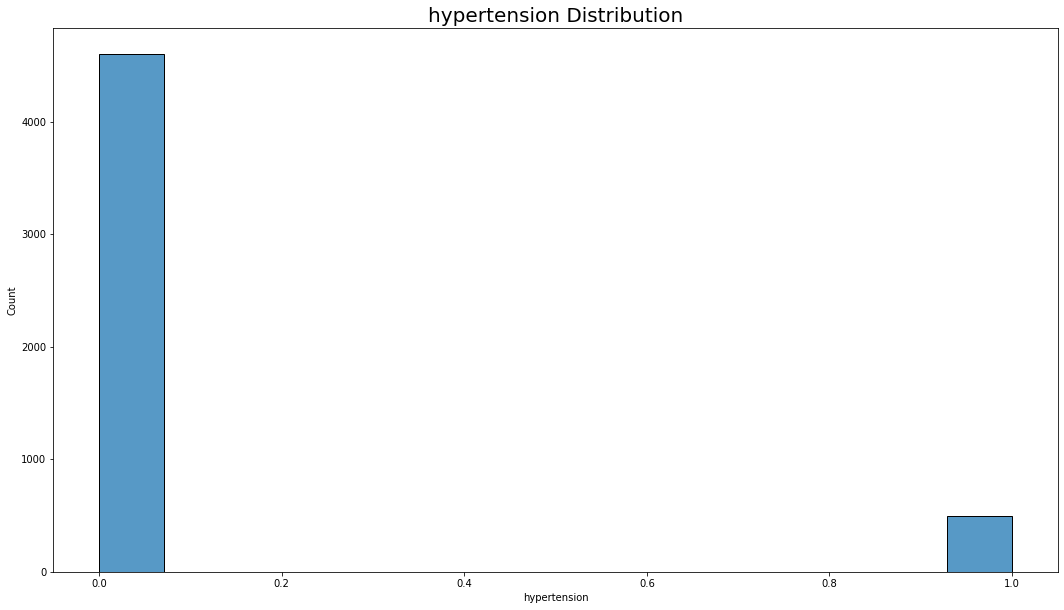

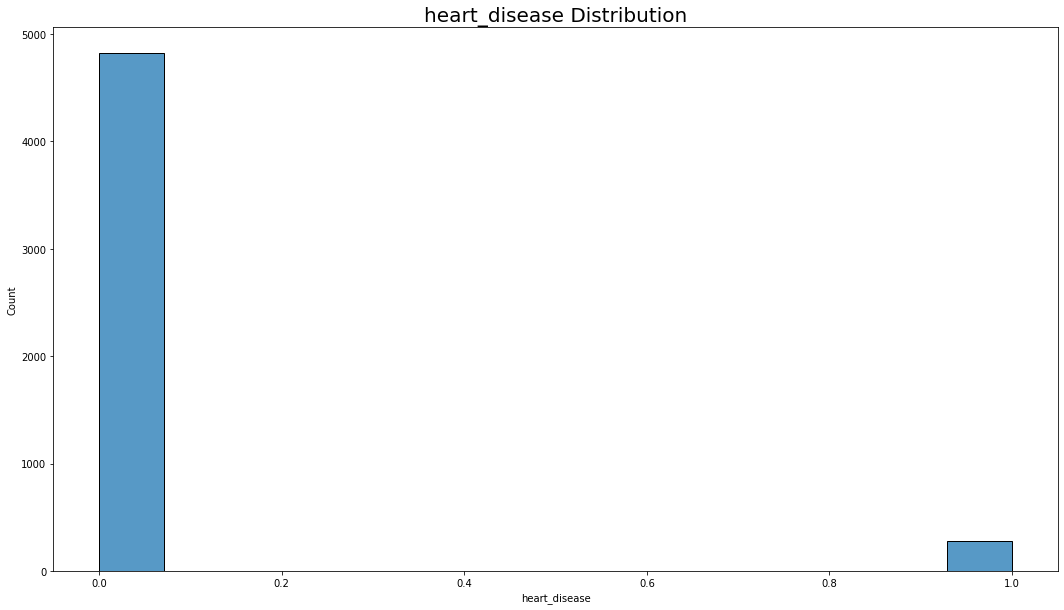

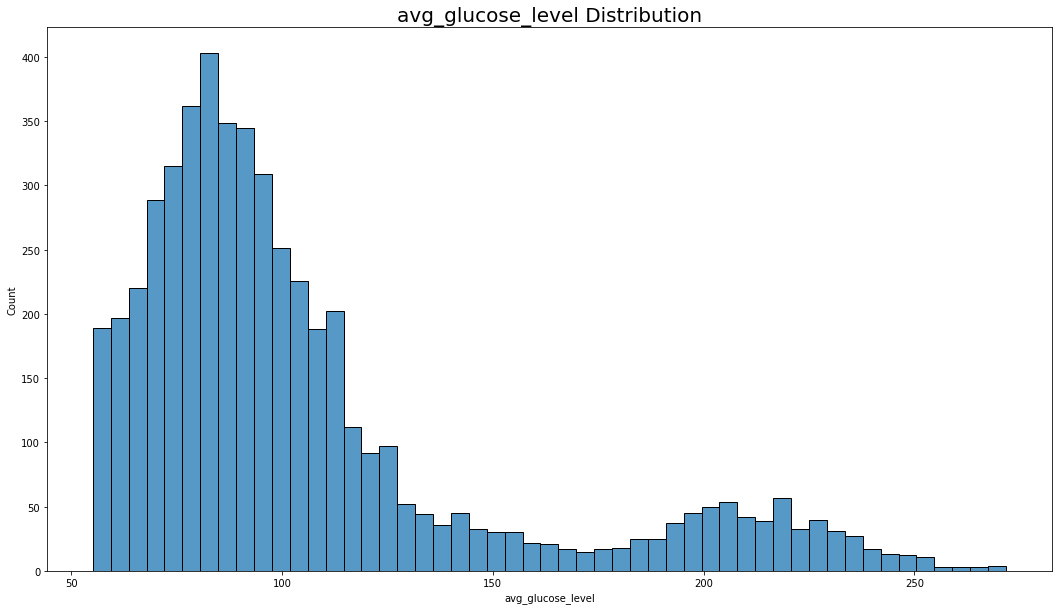

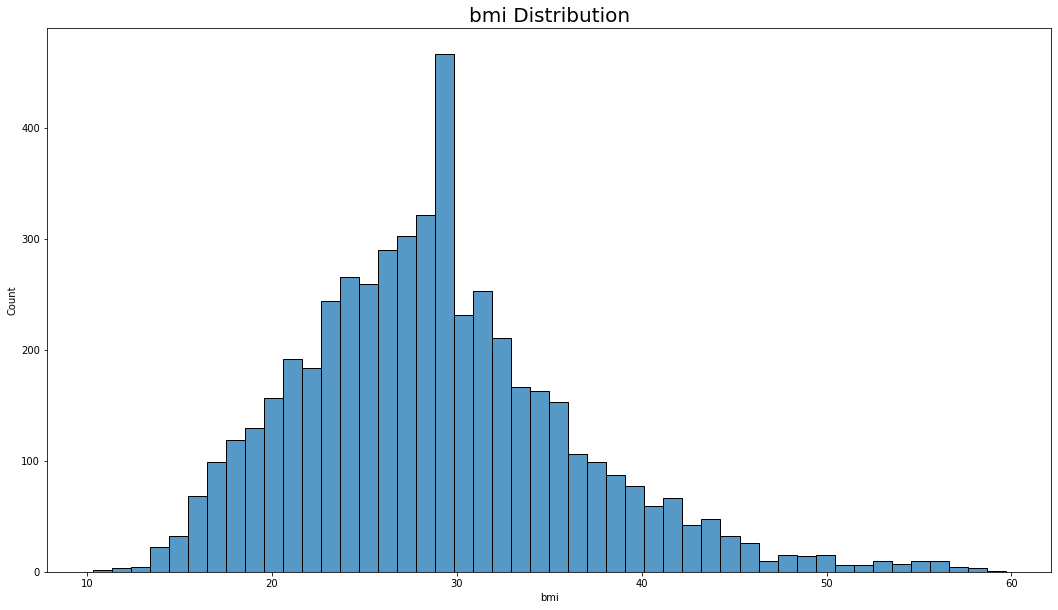

In [22]:
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.histplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()


Among the numerical features:
* `hypertension`  and `heart_disease` has a highly uneven distribution with the most data present in 0 
* `avg_glucose_level` and `bmi` shows quite a bit and slight right skewness respectively.

# Feature Selection

In [23]:
one_hot_encoded_training_predictors = pd.get_dummies(data)
data=one_hot_encoded_training_predictors 

In [24]:
X=data.iloc[:,0:11]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (5097, 11) 
y -  (5097,)


In [25]:
#Apply SelectKBest
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)

In [26]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [27]:
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

              Feature       Score
1                 age  320.032413
5                 bmi   69.485676
10    ever_married_No   37.249952
4   avg_glucose_level   27.887130
3       heart_disease    9.509764
0                  id    4.797043
2        hypertension    3.536518
8         gender_Male    0.513156
6              stroke    0.410864
7       gender_Female    0.353557
9        gender_Other    0.182050


In [28]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Female',
 'gender_Male',
 'gender_Other']

# Feature Splitting and Scaling

In [29]:
y = data['stroke']
X = data.drop(['stroke'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [30]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

In [31]:
 from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[1934    0]
 [ 105    0]]


Accuracy of Logistic Regression: 94.85041687101521 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1934
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2039
   macro avg       0.47      0.50      0.49      2039
weighted avg       0.90      0.95      0.92      2039



In [32]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1867   67]
 [  91   14]]


Accuracy of k-NN Classification: 92.25110348209907 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1934
           1       0.17      0.13      0.15       105

    accuracy                           0.92      2039
   macro avg       0.56      0.55      0.55      2039
weighted avg       0.91      0.92      0.92      2039



In [33]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1934    0]
 [ 105    0]]


Accuracy of Random Forest: 94.85041687101521 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1934
           1       0.00      0.00      0.00       105

    accuracy                           0.95      2039
   macro avg       0.47      0.50      0.49      2039
weighted avg       0.90      0.95      0.92      2039



In [34]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1860   74]
 [  90   15]]


Accuracy of DecisionTreeClassifier: 91.95684158901423 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1934
           1       0.17      0.14      0.15       105

    accuracy                           0.92      2039
   macro avg       0.56      0.55      0.56      2039
weighted avg       0.91      0.92      0.92      2039



In [35]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[1922   12]
 [ 103    2]]


Accuracy of Gradient Boosting Classifier: 94.35998038254047 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1934
           1       0.14      0.02      0.03       105

    accuracy                           0.94      2039
   macro avg       0.55      0.51      0.50      2039
weighted avg       0.91      0.94      0.92      2039



# **Model comparison**

In [36]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gvc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,94.850417
1,K-Nearest Neighbour,92.251103
2,Random Forest,94.850417
3,Decision Tree,91.956842
4,Gradient Boosting,94.359980
